# 实现一个简单的TPE算法

## 准备工作

### 导入库

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from torch import optim

import torchvision
import torchvision.transforms as transforms
from typing import List, Union, Tuple

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using {device}")

using cuda


### 准备数据集

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                         download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                           shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


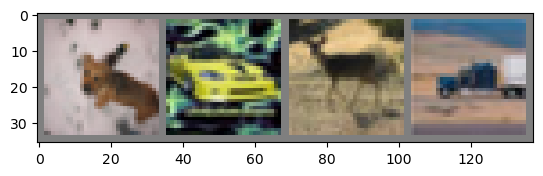

dog   car   deer  truck


In [4]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 实现TPE

In [5]:
from tpe import *

In [6]:
def test_target(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

In [7]:
optimize(test_target, 100, {'x': (-6, 6), 'y': (-6, 6)})

({'x': 4.094442247115133, 'y': -2.567282584307347}, -0.9927662890850101)
({'x': 4.094442247115133, 'y': -2.567282584307347}, -0.9927662890850101)
({'x': 4.094442247115133, 'y': -2.567282584307347}, -0.9927662890850101)
({'x': 4.5445830690119156, 'y': 0.8177991372971971}, -0.9955088470095657)
({'x': 4.473772783672384, 'y': 1.3322405184166084}, -0.9990115634833113)
({'x': 4.473772783672384, 'y': 1.3322405184166084}, -0.9990115634833113)
({'x': 4.473772783672384, 'y': 1.3322405184166084}, -0.9990115634833113)
({'x': 4.473772783672384, 'y': 1.3322405184166084}, -0.9990115634833113)
({'x': 4.473772783672384, 'y': 1.3322405184166084}, -0.9990115634833113)
({'x': 4.473772783672384, 'y': 1.3322405184166084}, -0.9990115634833113)
({'x': 4.473772783672384, 'y': 1.3322405184166084}, -0.9990115634833113)
({'x': 4.473772783672384, 'y': 1.3322405184166084}, -0.9990115634833113)
({'x': 4.473772783672384, 'y': 1.3322405184166084}, -0.9990115634833113)
({'x': 4.602719901904229, 'y': 0.8144645974525955}

({'x': 4.690332403568416, 'y': -0.45962467050756634}, -0.999999916008097)

我们将TPE与随机搜索比较

({'x': 2.1502766765921564, 'y': 4.616537650953942}, -0.9285304064829183)
({'x': 3.3952285370333897, 'y': -3.460309189652742}, -0.9908438163854177)
({'x': 3.3952285370333897, 'y': -3.460309189652742}, -0.9908438163854177)
({'x': 0.8578338031091279, 'y': -4.6124201544893015}, -0.9997821141702764)
({'x': 0.8578338031091279, 'y': -4.6124201544893015}, -0.9997821141702764)
({'x': 0.8578338031091279, 'y': -4.6124201544893015}, -0.9997821141702764)
({'x': 0.8578338031091279, 'y': -4.6124201544893015}, -0.9997821141702764)
({'x': 0.8578338031091279, 'y': -4.6124201544893015}, -0.9997821141702764)
({'x': 0.8578338031091279, 'y': -4.6124201544893015}, -0.9997821141702764)
({'x': 0.8578338031091279, 'y': -4.6124201544893015}, -0.9997821141702764)
({'x': 0.8578338031091279, 'y': -4.6124201544893015}, -0.9997821141702764)
({'x': 0.8578338031091279, 'y': -4.6124201544893015}, -0.9997821141702764)
({'x': 0.8578338031091279, 'y': -4.6124201544893015}, -0.9997821141702764)
({'x': 0.8578338031091279, 'y

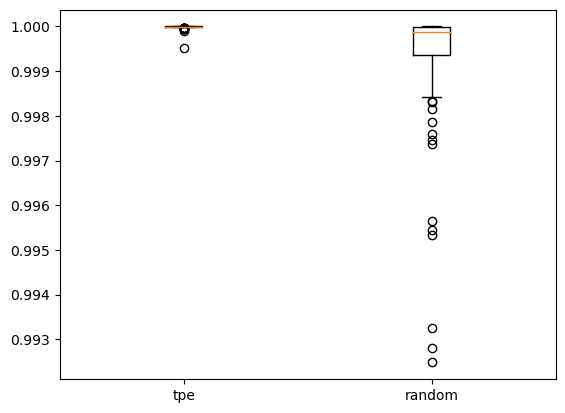

In [8]:
rand_res = [-optimize(test_target, 100, {'x': (-6, 6), 'y': (-6, 6)}, pure_random=True)[-1] for i in range(100)]
tpe_res = [-optimize(test_target, 100, {'x': (-6, 6), 'y': (-6, 6)})[-1] for i in range(100)]

plt.boxplot([tpe_res, rand_res], labels=["tpe", "random"])
plt.show()

可以看到，TPE发挥稳定且出色。下面试试量子化的抽取功能。

In [9]:
optimize(test_target, 100, {'x': list(range(-6, 6)), 'y': (-6, 6)})

({'x': 4, 'y': 2.1053540602538163}, -0.9815949744619623)
({'x': 4, 'y': 2.1053540602538163}, -0.9815949744619623)
({'x': 4, 'y': 2.1053540602538163}, -0.9815949744619623)
({'x': 4, 'y': 2.1053540602538163}, -0.9815949744619623)
({'x': -4, 'y': 2.5001207143518367}, -0.9999891162702716)
({'x': -4, 'y': 2.5001207143518367}, -0.9999891162702716)
({'x': -4, 'y': 2.5001207143518367}, -0.9999891162702716)
({'x': -4, 'y': 2.5001207143518367}, -0.9999891162702716)
({'x': -4, 'y': 2.5001207143518367}, -0.9999891162702716)
({'x': -4, 'y': 2.5001207143518367}, -0.9999891162702716)
({'x': -4, 'y': 2.5001207143518367}, -0.9999891162702716)
({'x': -4, 'y': 2.5001207143518367}, -0.9999891162702716)
({'x': -4, 'y': 2.5001207143518367}, -0.9999891162702716)
({'x': -4, 'y': 2.5001207143518367}, -0.9999891162702716)
({'x': -4, 'y': 2.5001207143518367}, -0.9999891162702716)
({'x': -4, 'y': 2.5001207143518367}, -0.9999891162702716)
({'x': -4, 'y': 2.5001207143518367}, -0.9999891162702716)
({'x': -4, 'y': 2.

({'x': -4, 'y': 2.5001207143518367}, -0.9999891162702716)

表现很好！接下来就可以用来条超参了。

In [10]:
class Net(nn.Module):
    def __init__(self, n_conv, n_flat, width_conv, width_flat, kernel_size):
        super().__init__()
        image_width = 32
        self.model = nn.Sequential()
        width_flat = round(width_flat)
        width_conv = round(width_conv)
        n_flat = round(n_flat)
        n_conv = round(n_conv)
        self.model.append(nn.Conv2d(3, width_conv, 2 * kernel_size + 1))
        image_width -= kernel_size * 2
        for i in range(n_conv):
            self.model.append(nn.Conv2d(width_conv, width_conv, 2 * kernel_size + 1))
            image_width -= kernel_size * 2
            self.model.append(nn.ReLU())
            self.model.append(nn.MaxPool2d(2, 2))
            image_width = int((image_width - 2) / 2 + 1)

        self.model.append(nn.Flatten())
        self.model.append(nn.Linear(image_width**2*width_conv, width_flat))
        for i in range(n_flat):
            self.model.append(nn.Linear(width_flat, width_flat))
            self.model.append(nn.ReLU())
        self.model.append(nn.Linear(width_flat, 10))
        self.model.append(nn.Softmax())

    def forward(self, x):
        return self.model(x)

def target(opt, lr, **kwargs):
    net = Net(**kwargs)
    net.to(device)
    optimizer_caller = optim.SGD if opt else optim.Adam
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer_caller(net.parameters(), lr=10**lr)
    l = 0
    print(opt, lr, kwargs)
    for epoch in range(50):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                l = running_loss / 2000
                running_loss = 0.0
    return l

In [10]:
optimize(target, 100, space={
    "opt": [0, 1],
    "lr": (-1, -3),
    "n_conv": (0, 2),
    "n_flat": (0, 4),
    "width_conv": [3, 20],
    "width_flat": (10, 300),
    "kernel_size": [1, 2],
})